# Movies rating prediction on MovieLens dataset

### Read data
- Import libraries
- Read the dataset files

### Data Preprocessing
- Drop unneccary columns
- Merge tables
- One hot encode categorical values
- Convert tags to sentiment analysis scores using NLTK

### Dataset spliting
- Split the dataset into training and testing sets

### Models Training & Evaluation
- Logistic Regression

### Choose the highst model
-

## Import Libraries

In [1]:
import os

#data analysis libraries 
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.preprocessing import MultiLabelBinarizer
import nltk

## Read Data Files

In [ ]:
root = os.path.join('..', 'ml-latest-small')

movies_df = pd.read_csv(os.path.join(root, "movies.csv"))
ratings_df = pd.read_csv(os.path.join(root, "ratings.csv"))
tags_df = pd.read_csv(os.path.join(root, "tags.csv"))


In [ ]:
movies_df.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [ ]:
ratings_df.head(2)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247


In [ ]:
tags_df.head(2)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996


## Preprocessing

- Movies table  - One hot encode the generes column.
- Merge Movies and Ratings tables.
- Convert float datatypes to integers
- Drop NaN values in rating column
- convert tag column to sentemint analysis using NLTK.Sentament_Analyzer

In [47]:
ratings = ratings_df
movies = movies_df
tags = tags_df

In [48]:
movies.genres = movies_df.genres.str.split('|')

movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [49]:
# genres one hot encoding 
list2series = pd.Series(movies.genres)

mlb = MultiLabelBinarizer()

one_hot_genres = pd.DataFrame(mlb.fit_transform(list2series), columns=mlb.classes_,index=list2series.index)

one_hot_genres.head(2)

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [50]:
# Add one hot encoded genres to movies df
for col in one_hot_genres:
    movies[col] = one_hot_genres[col]

movies.head(2)

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
movies_ratings = movies.merge(ratings, how='outer')
movies_ratings.head(5)

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,userId,rating,timestamp
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,1.0,4.0,9.649827e+08
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,5.0,4.0,8.474350e+08
2,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,7.0,4.5,1.106636e+09
3,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,15.0,2.5,1.510578e+09
4,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,17.0,4.5,1.305696e+09


In [52]:
movies_ratings['tag'] = 'NaN'

for index, movie in movies_ratings.iterrows():
    movie_tags = tags[tags.movieId == movie.movieId]
    user_movie_tags = movie_tags[movie.userId == movie_tags.userId]
    
    for tag_index, tag in user_movie_tags.iterrows():
        if tag.userId == movie.userId and tag.movieId == movie.movieId:
            if movie.tag == 'NaN':
                movies_ratings.loc[index, ['tag']] = tag.tag
            else:
                t = movie.tag + '|' + tag.tag
                movies_ratings.at[index, ['tag']] = t
        
movies_ratings.head()


,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,userId,rating,timestamp,tag
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,1,1,1,1,0,...,0,0,0,0,0,0,1.0,4.0,9.649827e+08,NaN
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,1,1,1,1,0,...,0,0,0,0,0,0,5.0,4.0,8.474350e+08,NaN
2,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,1,1,1,1,0,...,0,0,0,0,0,0,7.0,4.5,1.106636e+09,NaN
3,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,1,1,1,1,0,...,0,0,0,0,0,0,15.0,2.5,1.510578e+09,NaN
4,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,1,1,1,1,0,...,0,0,0,0,0,0,17.0,4.5,1.305696e+09,NaN


In [77]:
movies_ratings = movies_ratings.dropna(subset=['rating'])

movies_ratings.rating = movies_ratings.rating.astype(int)
movies_ratings.userId = movies_ratings.userId.astype(int)


movies_ratings.head()


,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,userId,rating,timestamp,tag
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,1,1,1,1,0,...,0,0,0,0,0,0,1,4,9.649827e+08,0.0
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,1,1,1,1,0,...,0,0,0,0,0,0,5,4,8.474350e+08,0.0
2,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,1,1,1,1,0,...,0,0,0,0,0,0,7,4,1.106636e+09,0.0
3,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,1,1,1,1,0,...,0,0,0,0,0,0,15,2,1.510578e+09,0.0
4,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,1,1,1,1,0,...,0,0,0,0,0,0,17,4,1.305696e+09,0.0


### Sentiment Analysis for the Tags 

In [57]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [58]:
sia = SentimentIntensityAnalyzer()

In [59]:
for i, rating in movies_ratings.iterrows():
    score = 0
    if rating.tag != 'NaN':
        
        tags_list = str(movies_ratings.loc[i, 'tag']).split('|')

        scores = 0
        for tag in tags_list:
            scores += sia.polarity_scores(tag)['compound']
        score = scores / len(tags_list)
        
    movies_ratings.loc[i, 'tag'] = score
movies_ratings.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,userId,rating,timestamp,tag
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,1,1,1,1,0,...,0,0,0,0,0,0,1,4.0,9.649827e+08,0.0
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,1,1,1,1,0,...,0,0,0,0,0,0,5,4.0,8.474350e+08,0.0
2,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,1,1,1,1,0,...,0,0,0,0,0,0,7,4.5,1.106636e+09,0.0
3,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,1,1,1,1,0,...,0,0,0,0,0,0,15,2.5,1.510578e+09,0.0
4,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,1,1,1,1,0,...,0,0,0,0,0,0,17,4.5,1.305696e+09,0.0


## Feature Selection

In [84]:
X = movies_ratings.drop(columns=['movieId', 'title', 'genres', 'userId', 'rating', 'timestamp'])
Y = movies_ratings['rating']
X.shape, Y.shape

((100836, 21), (100836,))

In [85]:
selected_features = list(X.columns.values)
selected_features

['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western',
 'tag']

In [87]:
Y.head()

0    4
1    4
2    4
3    2
4    4
Name: rating, dtype: int64

## Dataset Split

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
x_train , x_test , y_train , y_test = train_test_split(X, Y, test_size=0.20, random_state = 1, shuffle = True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((80668, 21), (20168, 21), (80668,), (20168,))

## Model A - Logistic Regression

### Training

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [65]:
regr = LinearRegression()

In [66]:
regr.fit(x_train,y_train)

LinearRegression()

### Evaluation

In [100]:
def eval(model, y_train, y_test):
    test_preds = model.predict(x_test)
    #train_preds = model.predict(x_train)
    
    #train_mse = metrics.mean_squared_error(y_train, train_preds)
    test_mse = metrics.mean_squared_error(y_test, test_preds)
    
    #train_score = metrics.accuracy_score(y_train,train_preds)
    test_score = metrics.accuracy_score(y_test, test_preds)

    #print("Training MSE = ", train_mse)
    #print("Training Score = ", train_score)

    print("Testing MSE = ", test_mse)
    print("Testing Score = ", test_score)
    
    cm = metrics.confusion_matrix(y_test, test_preds)
    
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);

In [76]:
eval(regr, y_train, y_test)

Training MSE =  1.040696326188563
Training Score =  0.03918401299706331
Testing MSE =  1.0574773341412647
Testing Score =  0.040077369628683135


## Model B - SVM

In [90]:
from sklearn.svm import LinearSVC

In [91]:
linsvc = LinearSVC(C=1)

In [92]:
linsvc.fit(x_train,y_train)

LinearSVC(C=1)

Training MSE =  1.3064908018049288
Training Score =  0.37494421579808596
Testing MSE =  1.3357298690995636
Testing Score =  0.37534708449028165


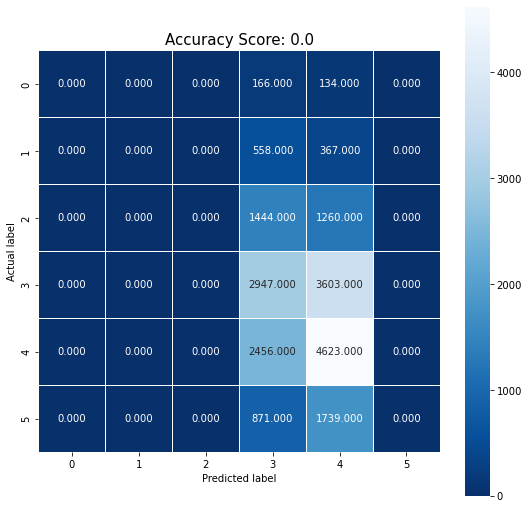

In [94]:
eval(linsvc, y_train, y_test)

## Model C - KNN 

In [95]:
from sklearn.neighbors import KNeighborsClassifier

In [96]:
knn = KNeighborsClassifier(n_neighbors=5)


In [97]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

Testing MSE =  1.9133280444268148
Testing Score =  0.29169972233240776


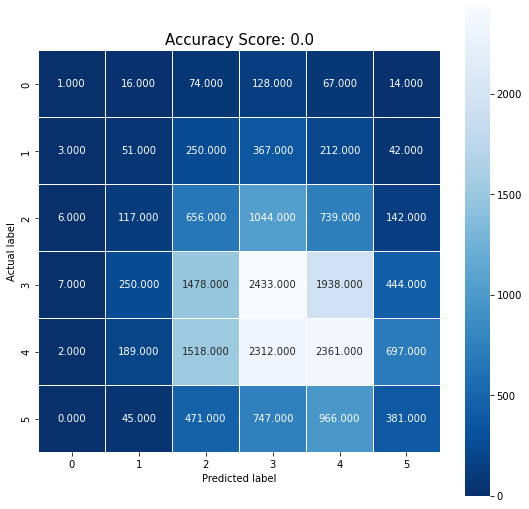

In [101]:
eval(knn, y_train, y_test)